In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import datetime

In [7]:
df = pd.read_csv('/content/drive/MyDrive/DelhiClimateData/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [9]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')

In [10]:
df['Month'] = df['date'].dt.month

In [13]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,Month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1


In [14]:
df['Year'] = df['date'].dt.year

In [58]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,Month,Year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


In [33]:
monthly_meantemp = {}
def unique(list1):
    x = np.array(list1)
    year = np.unique(x)

    return year

year = unique(df['Year'])
print(year)

[2013 2014 2015 2016 2017]


In [74]:
avg_temp_list = []
avg_humidity = []
avg_windspeed = []
avg_meanpressure = []
month_year_list = []
i = 0
j = 1
r = 0
k = year[0]
sum_temp = 0
sum_humidity = 0
sum_windspeed = 0
sum_meanpressure = 0
while(i < len(df)):
  if(df.loc[i, 'Year'] == k):
    if(df.loc[i, 'Month'] == j):
      sum_temp+= df.loc[i, 'meantemp']
      sum_humidity = df.loc[i, 'humidity']
      sum_windspeed = df.loc[i, 'wind_speed']
      sum_meanpressure = df.loc[i, 'meanpressure']
      r = r + 1
      i  = i + 1
    else:
      avg_temp_list.append(sum_temp / r)
      avg_humidity.append(sum_humidity / r)
      avg_windspeed.append(sum_windspeed / r)
      avg_meanpressure.append(sum_meanpressure / r)
      month_year_list.append(str(j)+'-'+str(k))
      sum_temp = 0
      r = 0
      j = j + 1
  else:
    j = 1
    k = k + 1

print(len(avg_temp_list))
print(len(month_year_list))

44
44


In [76]:
climate_analysis = pd.DataFrame()

climate_analysis['Months'] = month_year_list
climate_analysis['Average Temperature'] = avg_temp_list
climate_analysis['Average Humidity'] = avg_humidity
climate_analysis['Average Windspeed'] = avg_windspeed
climate_analysis['Average MeanPressure'] = avg_meanpressure

In [77]:
climate_analysis.head()

,Months,Average Temperature,Average Humidity,Average Windspeed,Average MeanPressure
0,1-2013,12.074770,2.116129,0.095484,32.851613
1,2-2013,16.867560,1.887755,0.462755,36.336735
2,3-2013,22.814209,1.870968,0.214839,32.535484
3,4-2013,28.895119,1.066667,0.264286,33.495238
4,5-2013,33.776767,1.294355,0.343145,32.216590


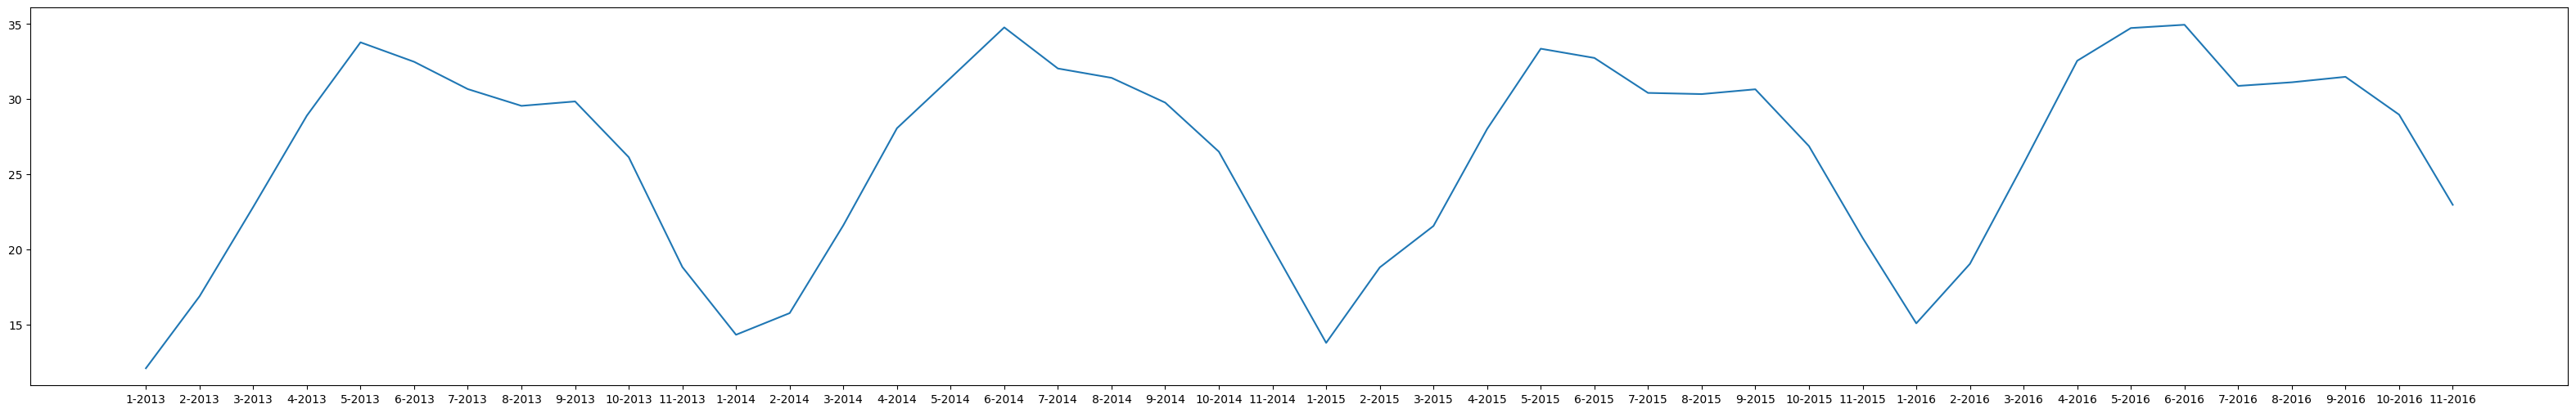

In [72]:
plt.figure(figsize=(40,6))
plt.plot(climate_analysis['Months'], climate_analysis['Average Temperature'])
plt.show()

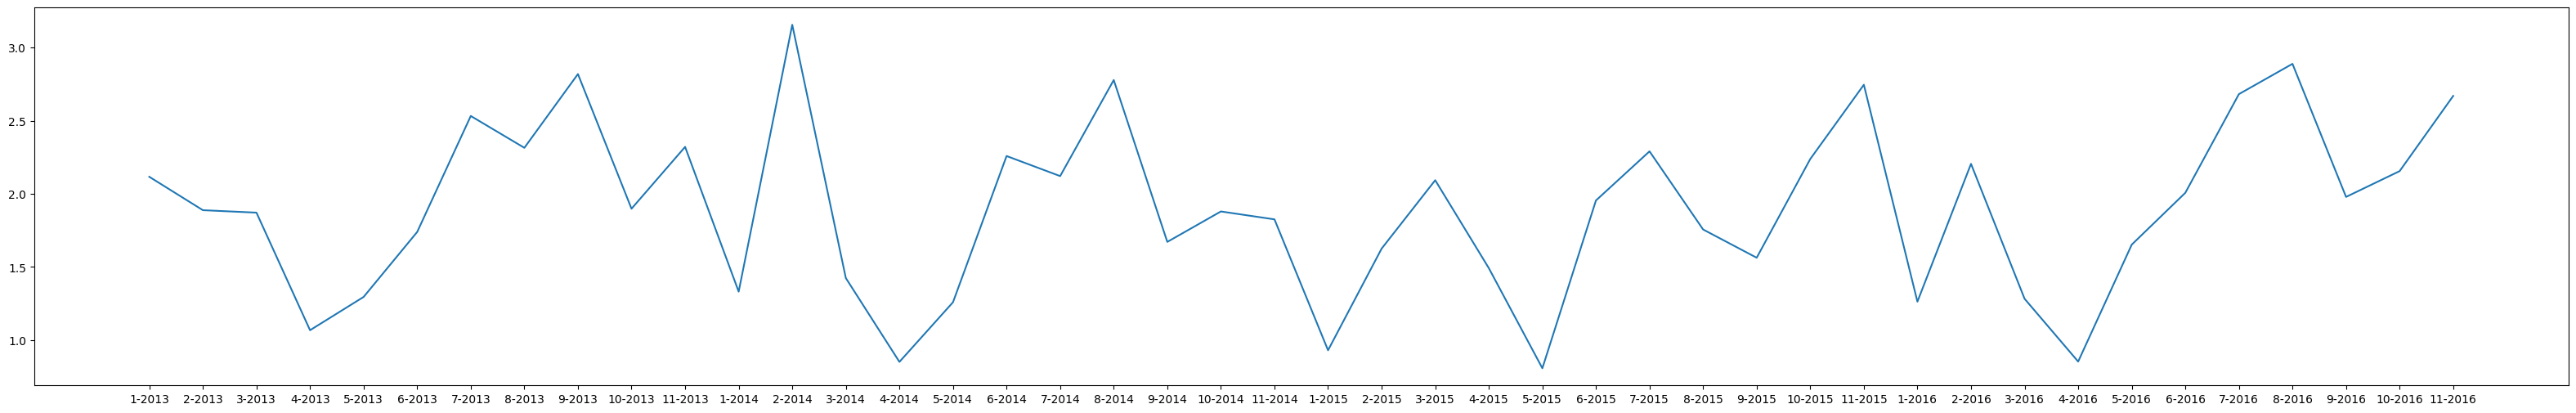

In [78]:
plt.figure(figsize=(40,6))
plt.plot(climate_analysis['Months'], climate_analysis['Average Humidity'])
plt.show()

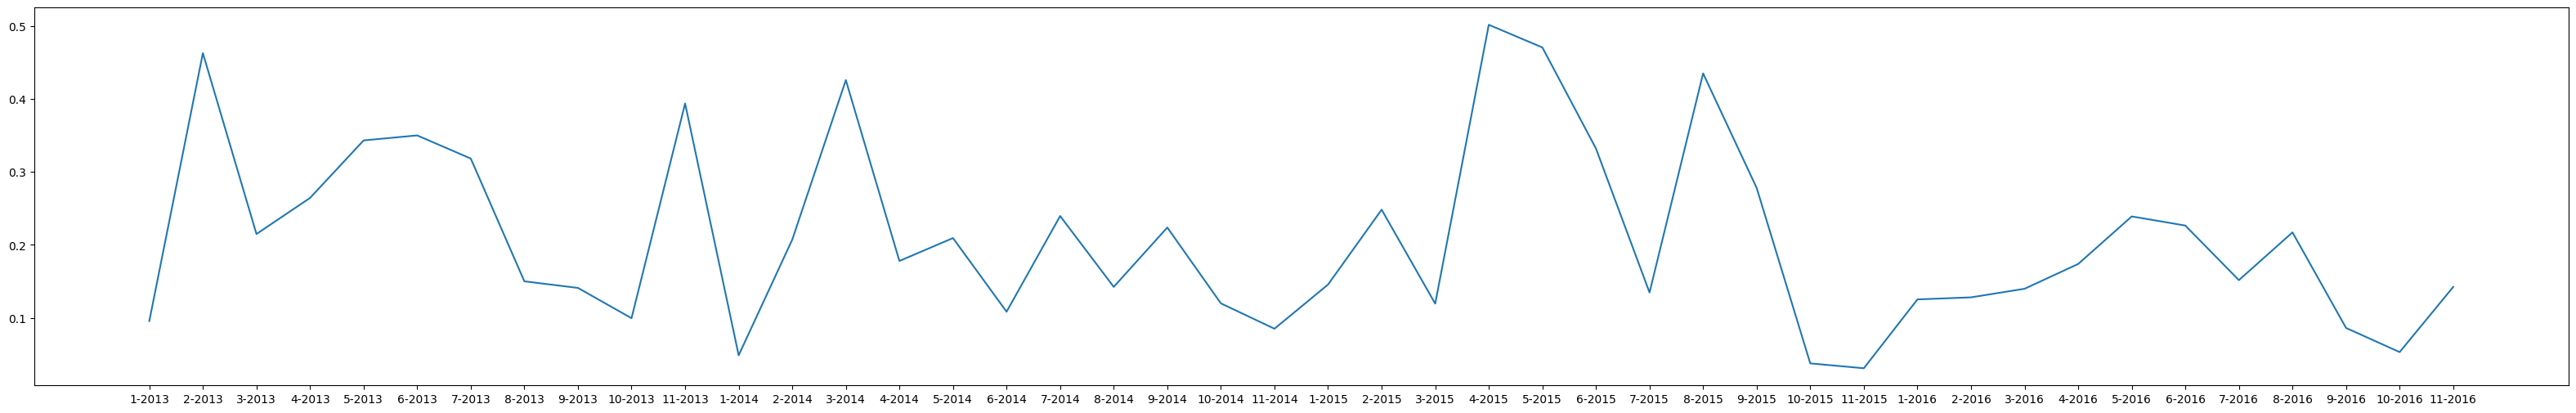

In [79]:
plt.figure(figsize=(40,6))
plt.plot(climate_analysis['Months'], climate_analysis['Average Windspeed'])
plt.show()

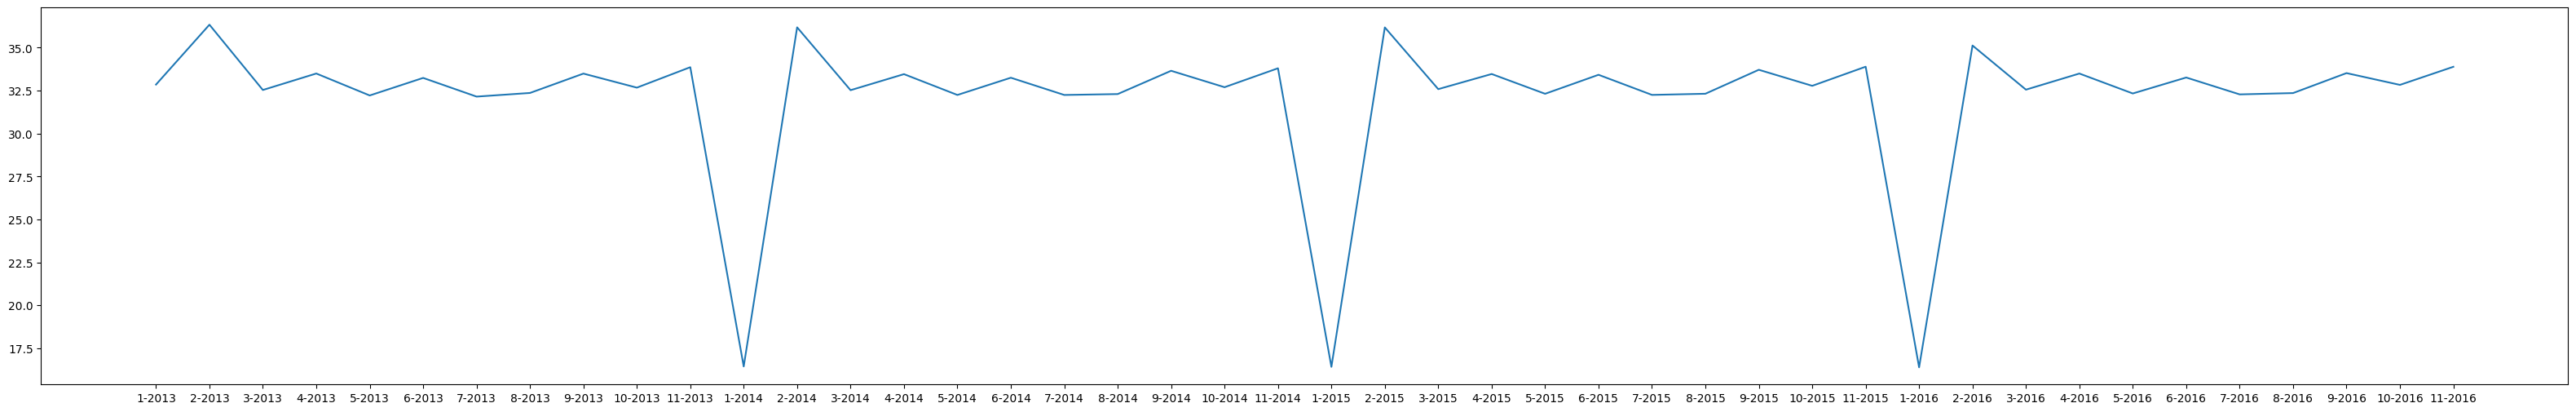

In [80]:
plt.figure(figsize=(40,6))
plt.plot(climate_analysis['Months'], climate_analysis['Average MeanPressure'])
plt.show()